Load relevant libraries.

In [1]:
import os
import numpy as np
import torch
import torchvision
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms as T

Use pretrained models from PyTorch and set them in eval mode.  
Note: choose `fasterrcnn_resnet50fpn` and three other models and name them `model0, model1, model2, model3`.
In the code block below, we have shown you how to load pretrained FasterRCNN_Resnet50_FPN. You should use this example to also load the other three models.

In [2]:
# Download a pretrained model
model0 = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model1 = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
model2 = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
model3 = torchvision.models.detection.fcos_resnet50_fpn(pretrained=True)

# Inference
model0.eval()
model1.eval()
model2.eval()
model3.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:00<00:00, 189MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth


100%|██████████| 74.2M/74.2M [00:00<00:00, 197MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


100%|██████████| 130M/130M [00:00<00:00, 185MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCOS_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FCOS_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fcos_resnet50_fpn_coco-99b0c9b7.pth" to /root/.cache/torch/hub/checkpoints/fcos_resnet50_fpn_coco-99b0c9b7.pth


100%|██████████| 124M/124M [00:03<00:00, 34.6MB/s]


FCOS(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=1e

MS-COCO class names list and utilities

In [3]:
# Defing PyTorch Transform
transform = T.Compose([T.ToTensor()])

# Define class names from MS-COCO dataset

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

Write a Python function that takes an image, model variable, and confidence threshold as input, and returns a list of predicted boxes and a list of predicted classes.

The commented lines with "!!!!" are what you are supposed to complete:



In [4]:
def get_detection(img, model, threshold=0.5):
  pred = model([img]) # Pass the image to the model

  # pred is a list and each element of that list is a dictionary with keys: "labels", "scores", and "boxes"
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Classes

  # !!!! Complete the following
  pred_boxes = list(pred[0]['boxes'].detach().numpy())   # Get the Prediction Boxes
  pred_score = list(pred[0]['scores'].detach().numpy())   # Get the Prediction Scores
  pred_t = len([s for s in pred_score if s > threshold]) - 1   # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]

  return pred_boxes, pred_class

Now use Matplotlib to write a function that takes an image path as input, uses `get_detection` to obtain a list of boxes and classes, and displays the detections. This code must  display the image, overlay the bounding boxes and predicted classes on top of the image as shown in the following example:
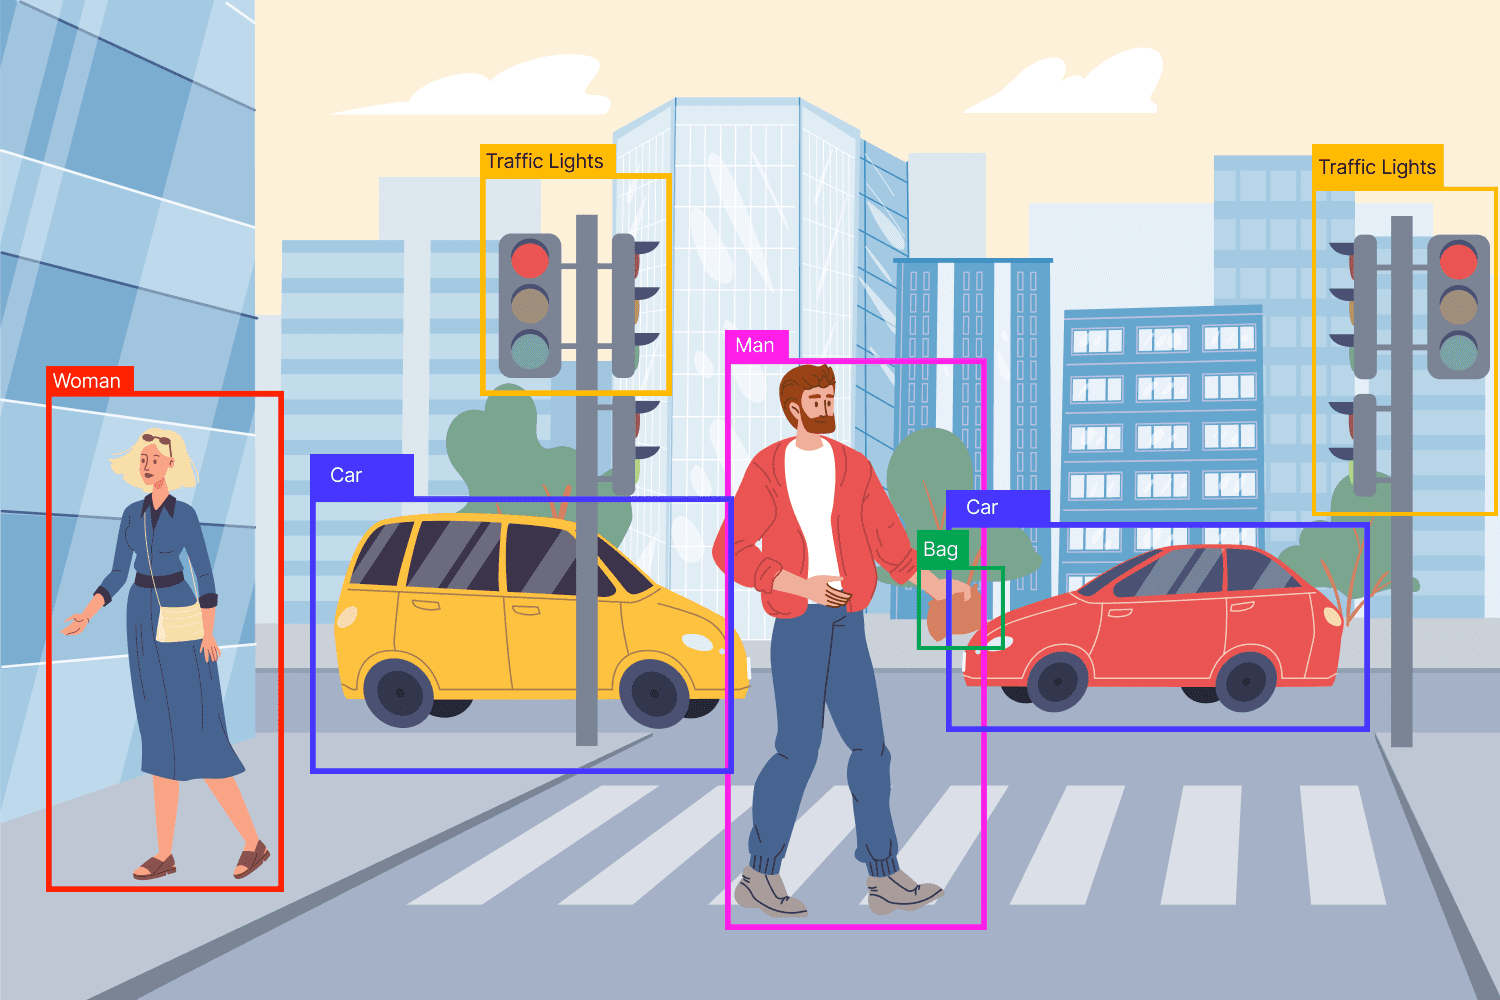

In [5]:
def show_detections(img_path, model, threshold=0.5):
  img = Image.open(img_path) # Load the image
  img = img.convert('RGB')
  img = transform(img) # Apply the transform to the image
  boxes, pred_cls = get_detection(img, model, threshold) # Get predictions
  img = cv2.imread(img_path) # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB

  # !!!! Complete the following
  # write code to display the image, overlay the bounding boxes and predicted classes on top of the image

  # Draw bounding boxes and class labels
  for i in range(len(boxes)):
    x1, y1, x2, y2 = boxes[i]
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color=(0, 255, 0), thickness=2)
    cv2.putText(img, pred_cls[i], (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), thickness=2)

  plt.figure(figsize=(8,14)) # display the output image
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  # !!!!
  plt.show()

Show the detections using all four models for `img_path=https://www.tejasgokhale.com/images/vehicle.png` and another image of your choice with at least 4 different objects.

--2025-10-30 04:06:57--  https://www.tejasgokhale.com/images/vehicle.png
Resolving www.tejasgokhale.com (www.tejasgokhale.com)... 185.199.108.153, 185.199.110.153, 185.199.111.153, ...
Connecting to www.tejasgokhale.com (www.tejasgokhale.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 581854 (568K) [image/png]
Saving to: ‘vehicle.jpg’

vehicle.jpg         100%[===================>] 568.22K  --.-KB/s    in 0.01s   

2025-10-30 04:06:57 (38.6 MB/s) - ‘vehicle.jpg’ saved [581854/581854]

Model 0 - FasterRCNN ResNet50 FPN:


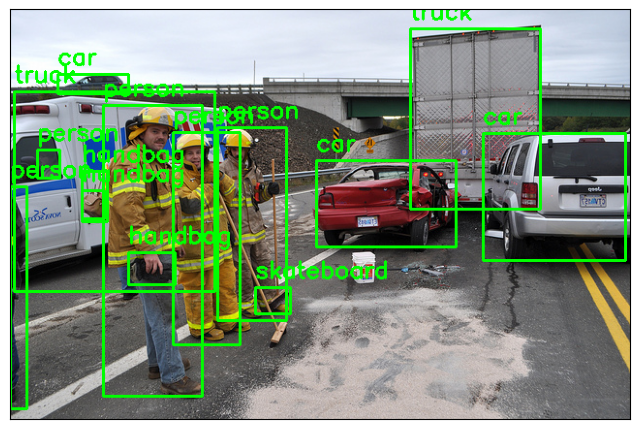

Model 1 - FasterRCNN MobileNet V3:


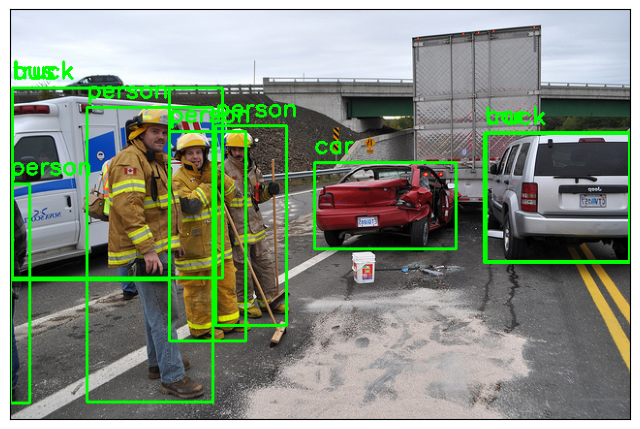

Model 2 - RetinaNet ResNet50 FPN:


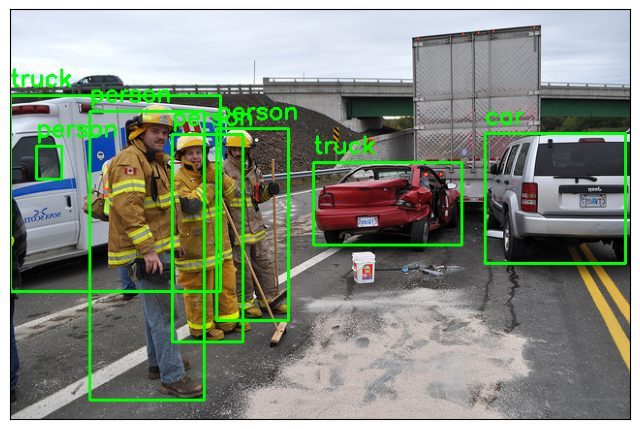

Model 3 - FCOS ResNet50 FPN:


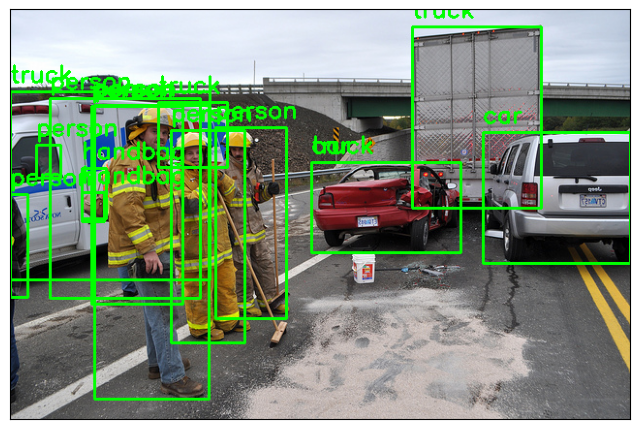

--2025-10-30 04:07:20--  https://pennaspillo.it/wp-content/uploads/2019/03/IMG_E4565.jpg
Resolving pennaspillo.it (pennaspillo.it)... 35.214.204.2
Connecting to pennaspillo.it (pennaspillo.it)|35.214.204.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70260 (69K) [image/jpeg]
Saving to: ‘IMG_E4565.jpg’

IMG_E4565.jpg       100%[===================>]  68.61K  --.-KB/s    in 0s      

2025-10-30 04:07:20 (155 MB/s) - ‘IMG_E4565.jpg’ saved [70260/70260]

Model 0 - FasterRCNN ResNet50 FPN:


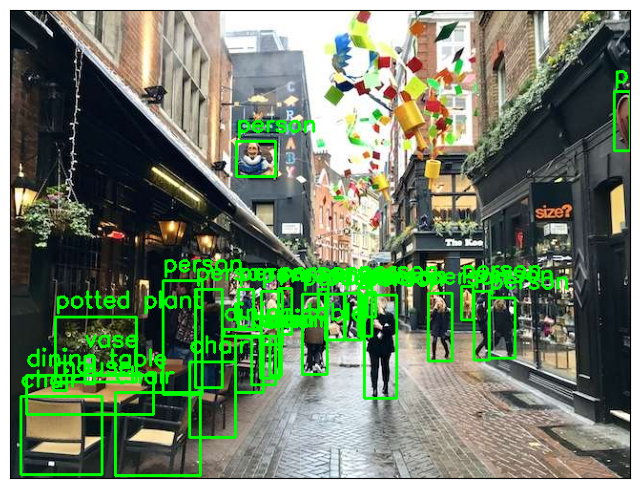

Model 1 - FasterRCNN MobileNet V3:


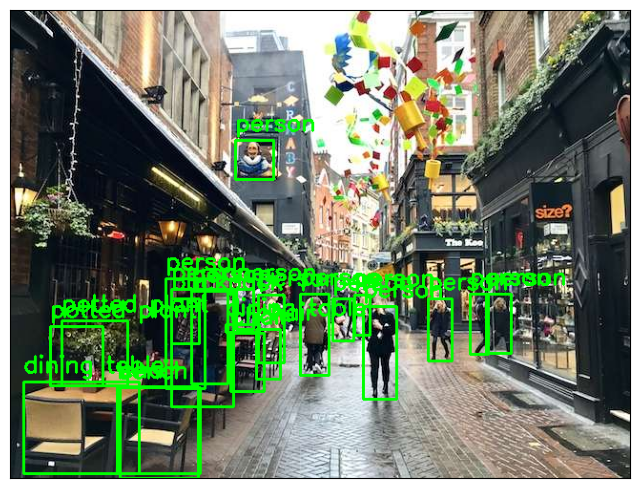

Model 2 - RetinaNet ResNet50 FPN:


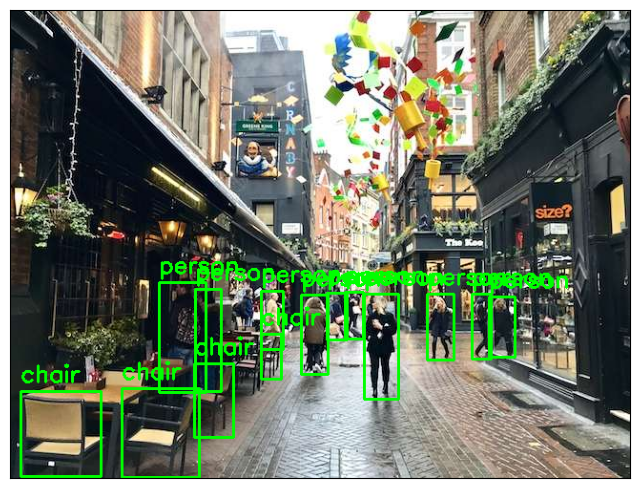

Model 3 - FCOS ResNet50 FPN:


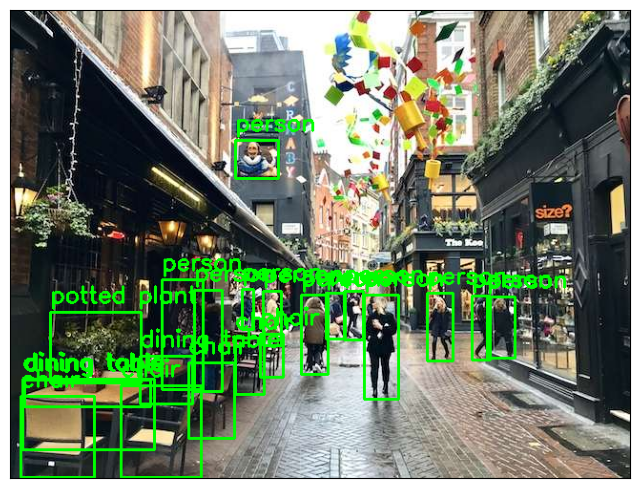

In [6]:
!wget https://www.tejasgokhale.com/images/vehicle.png -O vehicle.jpg
# code to use show_detections to display results for `model0,model1,model2,model3`
# !!!! Complete this

# Display detections for vehicle.jpg using all four models
print("Model 0 - FasterRCNN ResNet50 FPN:")
show_detections('vehicle.jpg', model0, threshold=0.5)

print("Model 1 - FasterRCNN MobileNet V3:")
show_detections('vehicle.jpg', model1, threshold=0.5)

print("Model 2 - RetinaNet ResNet50 FPN:")
show_detections('vehicle.jpg', model2, threshold=0.5)

print("Model 3 - FCOS ResNet50 FPN:")
show_detections('vehicle.jpg', model3, threshold=0.5)

!wget https://pennaspillo.it/wp-content/uploads/2019/03/IMG_E4565.jpg

# Display detections for scene.jpg using all four models
print("Model 0 - FasterRCNN ResNet50 FPN:")
show_detections('IMG_E4565.jpg', model0, threshold=0.5)

print("Model 1 - FasterRCNN MobileNet V3:")
show_detections('IMG_E4565.jpg', model1, threshold=0.5)

print("Model 2 - RetinaNet ResNet50 FPN:")
show_detections('IMG_E4565.jpg', model2, threshold=0.5)

print("Model 3 - FCOS ResNet50 FPN:")
show_detections('IMG_E4565.jpg', model3, threshold=0.5)

Now let's repeat this with an entire dataset of images. We will use MS-COCO (https://cocodataset.org/)
The code below walks you through downloading and loading images and annotations from the COCO dataset.
You do not need to edit this part.

In [7]:
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2025-10-30 04:07:36--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.162.113, 16.15.197.42, 52.216.50.105, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.162.113|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[===================>] 777.80M  44.2MB/s    in 19s     

2025-10-30 04:07:55 (41.5 MB/s) - ‘coco_val2017.zip’ saved [815585330/815585330]

--2025-10-30 04:07:55--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.15.188.98, 3.5.1.199, 52.217.206.17, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.15.188.98|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘coco_ann2017.zip’

coco_ann2017.zip    100%

In [8]:
from zipfile import ZipFile, BadZipFile
import os
def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
            zfile.extractall(extract_path)
        # remove zipfile
        zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)
    except BadZipFile as e:
        print("Error:", e)
extract_val_path = "./coco_val2017"
extract_ann_path="./coco_ann2017"
extract_zip_file(extract_val_path)
extract_zip_file(extract_ann_path)

In [9]:
from collections import defaultdict
import json
import numpy as np
class COCOParser:
    def __init__(self, anns_file, imgs_dir):
        with open(anns_file, 'r') as f:
            coco = json.load(f)

        self.annIm_dict = defaultdict(list)
        self.cat_dict = {}
        self.annId_dict = {}
        self.im_dict = {}
        self.licenses_dict = {}
        for ann in coco['annotations']:
            self.annIm_dict[ann['image_id']].append(ann)
            self.annId_dict[ann['id']]=ann
        for img in coco['images']:
            self.im_dict[img['id']] = img
        for cat in coco['categories']:
            self.cat_dict[cat['id']] = cat
        for license in coco['licenses']:
            self.licenses_dict[license['id']] = license
    def get_imgIds(self):
        return list(self.im_dict.keys())
    def get_annIds(self, im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        return [ann['id'] for im_id in im_ids for ann in self.annIm_dict[im_id]]
    def load_anns(self, ann_ids):
        im_ids=ann_ids if isinstance(ann_ids, list) else [ann_ids]
        return [self.annId_dict[ann_id] for ann_id in ann_ids]
    def load_cats(self, class_ids):
        class_ids=class_ids if isinstance(class_ids, list) else [class_ids]
        return [self.cat_dict[class_id] for class_id in class_ids]
    def get_imgLicenses(self,im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        lic_ids = [self.im_dict[im_id]["license"] for im_id in im_ids]
        return [self.licenses_dict[lic_id] for lic_id in lic_ids]

Now we will use the above dataloader to test the first 100 images from COCO

In [10]:
def eval_iou(pred_box, gt_box):
    gt_x1, gt_y1, gt_w, gt_h = gt_box
    gt_x2 = gt_x1 + gt_w
    gt_y2 = gt_y1 + gt_h

    pred_x1, pred_y1, pred_x2, pred_y2 = pred_box

    inter_x1 = max(pred_x1, gt_x1)
    inter_y1 = max(pred_y1, gt_y1)
    inter_x2 = min(pred_x2, gt_x2)
    inter_y2 = min(pred_y2, gt_y2)

    inter_area = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)

    pred_area = (pred_x2 - pred_x1) * (pred_y2 - pred_y1)
    gt_area = gt_w * gt_h
    union_area = pred_area + gt_area - inter_area

    iou = inter_area / union_area if union_area > 0 else 0
    return iou

def evaluate_model(model, img_ids, coco_images_dir, coco, iou_threshold=0.5):
    all_ious = []
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for i, im in enumerate(img_ids):
        image = Image.open(f"{coco_images_dir}/{str(im).zfill(12)}.jpg")
        image = image.convert('RGB')
        image_tensor = transform(image)
        pred_boxes, pred_class = get_detection(image_tensor, model)

        ann_ids = coco.get_annIds(im)
        annotations = coco.load_anns(ann_ids)

        matched_gts = set()

        for pred_idx, pred_box in enumerate(pred_boxes):
            best_iou = 0
            best_gt_idx = -1

            for gt_idx, ann in enumerate(annotations):
                gt_bbox = ann['bbox']
                iou = eval_iou(pred_box, gt_bbox)

                if iou > best_iou:
                    best_iou = iou
                    best_gt_idx = gt_idx

            all_ious.append(best_iou)

            if best_iou >= iou_threshold and best_gt_idx not in matched_gts:
                true_positives += 1
                matched_gts.add(best_gt_idx)
            else:
                false_positives += 1

        false_negatives += len(annotations) - len(matched_gts)

    mean_iou = sum(all_ious) / len(all_ious) if all_ious else 0
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    return mean_iou, precision, recall

coco_annotations_file="./coco_ann2017/annotations/instances_val2017.json"
coco_images_dir="./coco_val2017/val2017"
coco= COCOParser(coco_annotations_file, coco_images_dir)

img_ids = coco.get_imgIds()
n = 10
img_ids = img_ids[:n]

fmodels = [model0, model1, model2, model3]
model_names = ['FasterRCNN ResNet50', 'FasterRCNN MobileNet', 'RetinaNet ResNet50', 'FCOS ResNet50']
results = []

for model, name in zip(fmodels, model_names):
    print(f"Evaluating {name}...")
    mean_iou, precision, recall = evaluate_model(model, img_ids, coco_images_dir, coco)
    results.append([name, mean_iou, precision, recall])
    print(f"{name} - meanIOU: {mean_iou:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

# Display results in table
print("\n" + "="*70)
print(f"{'Model':<25} {'Mean IoU':<15} {'Precision':<15} {'Recall':<15}")
print("="*70)
for result in results:
    print(f"{result[0]:<25} {result[1]:<15.4f} {result[2]:<15.4f} {result[3]:<15.4f}")


        # !!!! write code that takes the ground-truth bbox and class_id and returns IoU score (intersection over union)
        # !!!! you should write it as a separate function eval_iou() and call it inside the loop
        # !!!! also calculate the meanIOU over the entire dataset of 100 images
        # !!!! report the meanIOU for all 4 models


Evaluating FasterRCNN ResNet50...
FasterRCNN ResNet50 - meanIOU: 0.5221, Precision: 0.5285, Recall: 0.6701
Evaluating FasterRCNN MobileNet...
FasterRCNN MobileNet - meanIOU: 0.5777, Precision: 0.6163, Recall: 0.5464
Evaluating RetinaNet ResNet50...
RetinaNet ResNet50 - meanIOU: 0.7612, Precision: 0.8163, Recall: 0.4124
Evaluating FCOS ResNet50...
FCOS ResNet50 - meanIOU: 0.6226, Precision: 0.6707, Recall: 0.5670

Model                     Mean IoU        Precision       Recall         
FasterRCNN ResNet50       0.5221          0.5285          0.6701         
FasterRCNN MobileNet      0.5777          0.6163          0.5464         
RetinaNet ResNet50        0.7612          0.8163          0.4124         
FCOS ResNet50             0.6226          0.6707          0.5670         
